<a href="https://colab.research.google.com/github/H12-25-L-Equipo-36/Hackaton-Flightdelay/blob/Data_science/flights_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Proyecto Retraso de Vuelos Hackathon** 🛩️

**Objetivo del analisis:**

Todos los que viajan en avión —y especialmente las aerolíneas y aeropuertos— sufren con retrasos.

Estos retrasos causan insatisfacción en los pasajeros, costos extras para las empresas y problemas de logística (como conexiones perdidas y reajustes de vuelos).

*El cliente quiere predecir, basándose en datos del vuelo (origen, destino, hora, aerolínea, etc.), cuál es la probabilidad de que el vuelo se retrase para prepararse con antelación:*

* Los pasajeros pueden recibir alertas antes de salir de casa.

* Las aerolíneas pueden ajustar la operación y minimizar el impacto.

* Los aeropuertos pueden planificar mejor el uso de la infraestructura.

## Proceso de Extraccion


In [ ]:
#Importando los data sets con Gdown este se encuentra separado ya que nos se desea reeinstalar cada vez al inicar el libro,
#-q lo utilizamos para reducir el ruido que genera la instalación para que no haya ningun tipo de confusión

!pip install gdown
import gdown
import pandas as pd


gdown.download("https://drive.google.com/uc?id=1bsw3JzrTO9TvkeWXkwzzkcoIauIUATa5", "airlines.csv", quiet=False)
gdown.download("https://drive.google.com/uc?id=1oKHerKcWhA8LqE1qGRBhhpKtFe0dV6-e", "flights.csv", quiet=False)




Downloading...
From: https://drive.google.com/uc?id=1bsw3JzrTO9TvkeWXkwzzkcoIauIUATa5
To: /content/airlines.csv
100%|██████████| 18.5M/18.5M [00:00<00:00, 52.8MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1oKHerKcWhA8LqE1qGRBhhpKtFe0dV6-e
From (redirected): https://drive.google.com/uc?id=1oKHerKcWhA8LqE1qGRBhhpKtFe0dV6-e&confirm=t&uuid=701dcf07-86c8-480d-aa84-55625ae1e313
To: /content/flights.csv
100%|██████████| 592M/592M [00:06<00:00, 96.9MB/s]


'flights.csv'

In [ ]:
df1 = pd.read_csv("airlines.csv")
dfA  = pd.read_csv("flights.csv")

/tmp/ipython-input-1916395641.py:2: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  dfA  = pd.read_csv("flights.csv")


##Exploracion Inicial de los datos

In [ ]:
dfA.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfA.shape

(5819079, 31)

In [ ]:
# Eliminamos columnas NO relevantes para el analisis
dfA = dfA.drop(columns=[
    'TAIL_NUMBER',
    'SCHEDULED_DEPARTURE',
    'DIVERTED',
    'AIR_SYSTEM_DELAY',
    'SECURITY_DELAY',
    'AIRLINE_DELAY',
    'LATE_AIRCRAFT_DELAY',
    'TAXI_OUT',
    'WHEELS_ON',
    'YEAR',
    'TAXI_IN',
    'ELAPSED_TIME'
])


In [ ]:
df1.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_TIME,DEPARTURE_DELAY,WHEELS_OFF,SCHEDULED_TIME,AIR_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,CANCELLATION_REASON,WEATHER_DELAY
0,1,1,4,AS,98,ANC,SEA,2354.0,-11.0,15.0,205.0,169.0,1448,430,408.0,-22.0,0,NaN,NaN
1,1,1,4,AA,2336,LAX,PBI,2.0,-8.0,14.0,280.0,263.0,2330,750,741.0,-9.0,0,NaN,NaN
2,1,1,4,US,840,SFO,CLT,18.0,-2.0,34.0,286.0,266.0,2296,806,811.0,5.0,0,NaN,NaN
3,1,1,4,AA,258,LAX,MIA,15.0,-5.0,30.0,285.0,258.0,2342,805,756.0,-9.0,0,NaN,NaN
4,1,1,4,AS,135,SEA,ANC,24.0,-1.0,35.0,235.0,199.0,1448,320,259.0,-21.0,0,NaN,NaN


In [ ]:
df1.shape

(5819079, 19)

##Limpieza de datos

 **Variables a tomar en cuenta**

airline

origin

destination

day_of_weeek

time

distance_km





##### Limpieza de DF1

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


In [ ]:
#Se renombran las columnas relevantes para mantener el orden
df1 = df1.rename(columns={
    "Airline": "airline",
    "AirportFrom": "origin",
    "AirportTo": "destination",
    "DayOfWeek": "day_of_week",
    "Time": "time",
    "Length": "distance_km",
  "Delay": "delay"
})

In [ ]:
#visualizacion del head y tail del dataframe
df1

,id,airline,Flight,origin,destination,day_of_week,time,distance_km,delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0
539379,539380,FL,398,SEA,ATL,5,1439,305,0
539380,539381,FL,609,SFO,MKE,5,1439,255,0
539381,539382,UA,78,HNL,SFO,5,1439,313,1


In [ ]:
# se contabilizan los datos nulos (en este caso no hubieron)
df1.isnull().sum()

,0
id,0
airline,0
Flight,0
origin,0
destination,0
day_of_week,0
time,0
distance_km,0
delay,0


##### Limpieza de DFA

In [ ]:
#Se renombran las columnas relevantes para mantener el orden
dfA = dfA.rename(columns={
    "AIRLINE": "airline",
    "ORIGIN_AIRPORT": "origin",
    "DESTINATION_AIRPORT": "destination",
    "DAY_OF_WEEK": "day_of_week",
    "DEPARTURE_TIME": "time",
    "DISTANCE": "distance_km",
  "DEPARTURE_DELAY": "delay"

})

In [ ]:
dfA.head()

,YEAR,MONTH,DAY,day_of_week,airline,FLIGHT_NUMBER,TAIL_NUMBER,origin,destination,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# se contabilizan los datos nulos (en este caso si hubieron)
dfA.isnull().sum()

,0
YEAR,0
MONTH,0
DAY,0
day_of_week,0
airline,0
FLIGHT_NUMBER,0
TAIL_NUMBER,14721
origin,0
destination,0
SCHEDULED_DEPARTURE,0


In [ ]:
#se eliminan los datos nulos de las column y delay
dfA= dfA.dropna(subset=["time","delay"])

In [ ]:
#se confirma que si hayan sido eliminados
dfA.isnull().sum()

,0
YEAR,0
MONTH,0
DAY,0
day_of_week,0
airline,0
FLIGHT_NUMBER,0
TAIL_NUMBER,0
origin,0
destination,0
SCHEDULED_DEPARTURE,0


#### Union de df1 y dfA en un solo dataframe

In [ ]:
# se especifican las columnas relevantes y se concatenan
clms=['airline','day_of_week','origin','destination','time','delay','distance_km']
df_flights= df1[clms]
df_flights_1= dfA[clms]

df_final_data= pd.concat([df_flights,df_flights_1], ignore_index=True)

In [ ]:
df_final_data.head()

,airline,day_of_week,origin,destination,time,delay,distance_km
0,CO,3,SFO,IAH,15.0,1.0,205
1,US,3,PHX,CLT,15.0,1.0,222
2,AA,3,LAX,DFW,20.0,1.0,165
3,AA,3,SFO,DFW,20.0,1.0,195
4,AS,3,ANC,SEA,30.0,0.0,202


In [ ]:
# se confirma que no hayan datos duplicados
df_duplicados = df_final_data.duplicated().sum()

In [ ]:
df_final_data


,airline,day_of_week,origin,destination,time,delay,distance_km
0,CO,3,SFO,IAH,15.0,1.0,205
1,US,3,PHX,CLT,15.0,1.0,222
2,AA,3,LAX,DFW,20.0,1.0,165
3,AA,3,SFO,DFW,20.0,1.0,195
4,AS,3,ANC,SEA,30.0,0.0,202
...,...,...,...,...,...,...,...
6272304,B6,4,LAX,BOS,2355.0,-4.0,2611
6272305,B6,4,JFK,PSE,2355.0,-4.0,1617
6272306,B6,4,JFK,SJU,2350.0,-9.0,1598
6272307,B6,4,MCO,SJU,2353.0,-6.0,1189


In [ ]:
# se crea una columna llamada "Hour" que divide la hora de la columna "Time" para una mayor comprension
df_final_data ["Hour"] = df_final_data["time"] //100

In [ ]:
# se renombran las columnas de distance y hour
df_final_data = df_final_data.rename(columns={
    'distance_km': 'distance_mil',
    'Hour':'hour'
})

In [ ]:
df_final_data.head()

,airline,day_of_week,origin,destination,time,delay,distance_mil,hour
0,CO,3,SFO,IAH,15.0,1.0,205,0.0
1,US,3,PHX,CLT,15.0,1.0,222,0.0
2,AA,3,LAX,DFW,20.0,1.0,165,0.0
3,AA,3,SFO,DFW,20.0,1.0,195,0.0
4,AS,3,ANC,SEA,30.0,0.0,202,0.0


In [ ]:
#se hace una columna con los datos de la columna distance_millas pero pasados a kilometros
df_final_data ["distance_km"] = df_final_data["distance_mil"] * 1.60934
df_final_data['distance_km'] = df_final_data['distance_km'].round(2)

In [ ]:
#se miran las diferencias de time y hour
df_final_data[['time','hour']].head(15)

,time,hour
0,15.0,0.0
1,15.0,0.0
2,20.0,0.0
3,20.0,0.0
4,30.0,0.0
5,30.0,0.0
6,30.0,0.0
7,30.0,0.0
8,35.0,0.0
9,40.0,0.0


In [ ]:
# se observa la proporcion de la columna delays y se nota que hay muchos valores que son mayores que 1 lo cual no nos funciona para el entrenamiento de la ML
df_final_data["delay"].value_counts(normalize=True)

,proportion
delay,
0.0,1.001990e-01
-3.0,7.260596e-02
-4.0,7.079578e-02
-5.0,6.996530e-02
-2.0,6.939024e-02
...,...
-47.0,1.594309e-07
779.0,1.594309e-07
827.0,1.594309e-07


In [ ]:
# despues de investigar descubrimos que los datos menores que 0 cuentan como "a tiempo" y los mayores de 1 cuentan como "atraso"
#asi que creamos una columna llamada "delays" donde estos valores esten normalizados
df_final_data ["delays"] = (df_final_data["delay"]>0 ).astype(int)

In [ ]:
# comprobamos que los cambios se hayan realizado
df_final_data

,airline,day_of_week,origin,destination,time,delay,distance_mil,hour,distance_km,delays
0,CO,3,SFO,IAH,15.0,1.0,205,0.0,329.91,1
1,US,3,PHX,CLT,15.0,1.0,222,0.0,357.27,1
2,AA,3,LAX,DFW,20.0,1.0,165,0.0,265.54,1
3,AA,3,SFO,DFW,20.0,1.0,195,0.0,313.82,1
4,AS,3,ANC,SEA,30.0,0.0,202,0.0,325.09,0
...,...,...,...,...,...,...,...,...,...,...
6272304,B6,4,LAX,BOS,2355.0,-4.0,2611,23.0,4201.99,0
6272305,B6,4,JFK,PSE,2355.0,-4.0,1617,23.0,2602.30,0
6272306,B6,4,JFK,SJU,2350.0,-9.0,1598,23.0,2571.73,0
6272307,B6,4,MCO,SJU,2353.0,-6.0,1189,23.0,1913.51,0


In [ ]:
#observamos el tamaño final de los datos
df_final_data.shape

(6272309, 10)

In [ ]:
#finalmente podemos ver la proporcion de los delays
df_final_data["delays"].value_counts(normalize=True)

,proportion
delays,
0,0.622805
1,0.377195


In [ ]:
df_final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6272309 entries, 0 to 6272308
Data columns (total 10 columns):
 #   Column        Dtype  
---  ------        -----  
 0   airline       object 
 1   day_of_week   int64  
 2   origin        object 
 3   destination   object 
 4   time          float64
 5   delay         float64
 6   distance_mil  int64  
 7   hour          float64
 8   distance_km   float64
 9   delays        int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 478.5+ MB


## Analisis y Visualizacion



/tmp/ipython-input-4276447602.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="delays", data=df_final_data, palette=["#45B39D", "#EC7063"])
/tmp/ipython-input-4276447602.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Puntual (0)", "Retrasado (1)"])


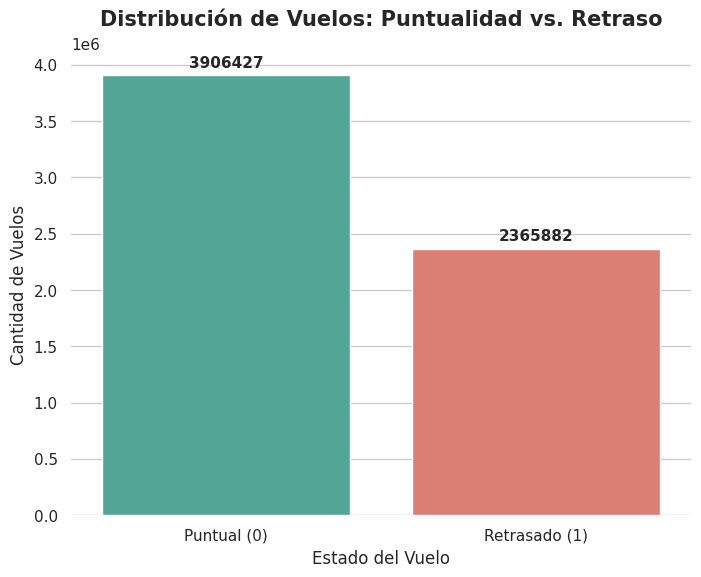

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Configuramos el estilo estético
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))

# 2. Creamos el gráfico con Seaborn
ax = sns.countplot(x="delays", data=df_final_data, palette=["#45B39D", "#EC7063"])

# 3. Personalización de textos
plt.title("Distribución de Vuelos: Puntualidad vs. Retraso", fontsize=15, fontweight='bold', pad=20)
plt.xlabel("Estado del Vuelo", fontsize=12)
plt.ylabel("Cantidad de Vuelos", fontsize=12)

# Mejoramos las etiquetas del eje X para que no sean solo 0 y 1
ax.set_xticklabels(["Puntual (0)", "Retrasado (1)"])

# Ponemos el número exacto encima de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points',
                fontsize=11, fontweight='bold')

# Limpiamos los bordes para que se vea más moderno
sns.despine(left=True, bottom=True)

plt.show()

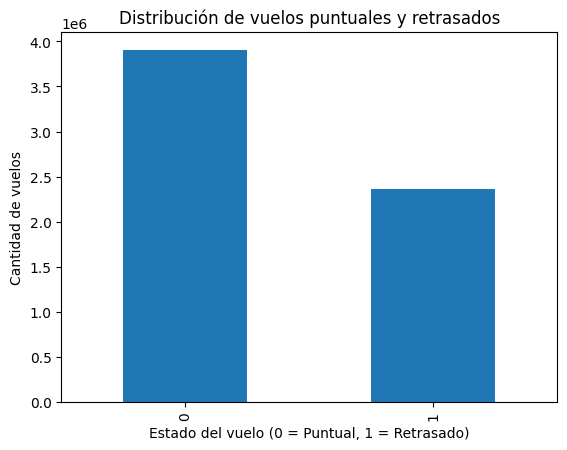

In [ ]:

plt.figure()
df_final_data["delays"].value_counts().plot(kind="bar")
plt.xlabel("Estado del vuelo (0 = Puntual, 1 = Retrasado)")
plt.ylabel("Cantidad de vuelos")
plt.title("Distribución de vuelos puntuales y retrasados")
plt.show()


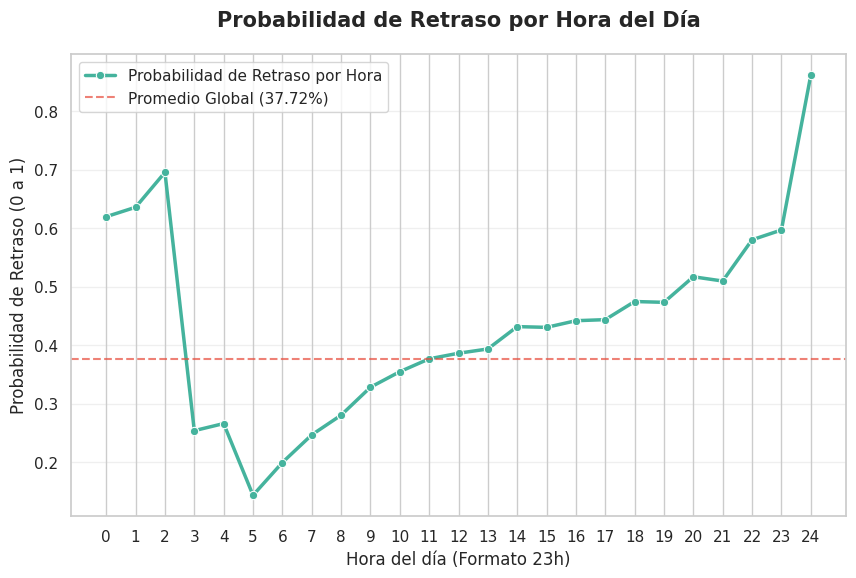

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))


mean_delay = df_final_data["delays"].mean()

data_hour = df_final_data.groupby("hour")["delays"].mean()

sns.lineplot(x=data_hour.index, y=data_hour.values,marker='o',color="#45B39D", linewidth=2.5, label="Probabilidad de Retraso por Hora")


plt.axhline(mean_delay, linestyle="--", color='#E74C3C', alpha=0.7, label=f'Promedio Global ({mean_delay:.2%})')
# ... (tu código anterior igual)


# CORRECCIÓN AQUÍ: range(0, 24) genera del 0 al 23
plt.xticks(range(0, 24))

plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.title("Probabilidad de Retraso por Hora del Día", fontsize=15, fontweight='bold', pad=20)
plt.xlabel("Hora del día (Formato 23h)", fontsize=12)
plt.ylabel("Probabilidad de Retraso (0 a 1)", fontsize=12)
plt.xticks(range(0, 25)) # Asegura que se vean todas las horas
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.show()

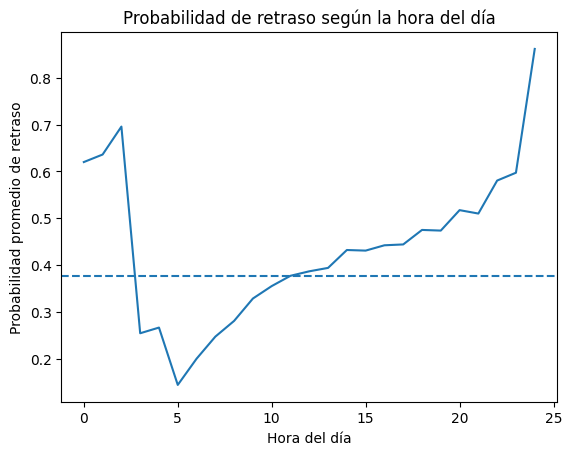

In [ ]:
plt.figure()
df_final_data.groupby("hour")["delays"].mean().plot()
plt.axhline(df_final_data["delays"].mean(), linestyle="--")
plt.xlabel("Hora del día")
plt.ylabel("Probabilidad promedio de retraso")
plt.title("Probabilidad de retraso según la hora del día")
plt.show()


En esta grafica de barras podemos observar que el dia de la semana con mayor promedio de delays es el jueves y el menor el

/tmp/ipython-input-3174371775.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=day_of_week_delays.values, y=day_labels, palette="Reds_r")


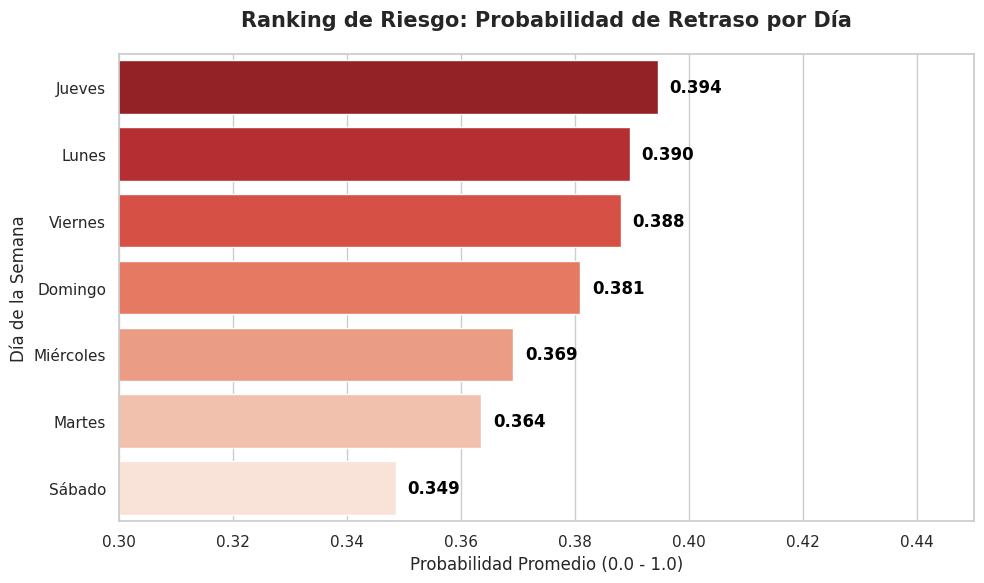

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


day_of_week_delays = df_final_data.groupby("day_of_week")["delays"].mean().sort_values(ascending=False)
day_names_map = {1: 'Lunes', 2: 'Martes', 3: 'Miércoles', 4: 'Jueves', 5: 'Viernes', 6: 'Sábado', 7: 'Domingo'}
day_labels = [day_names_map[day] for day in day_of_week_delays.index]


plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")


ax = sns.barplot(x=day_of_week_delays.values, y=day_labels, palette="Reds_r")

plt.xlim(0.30, 0.45)


plt.title("Ranking de Riesgo: Probabilidad de Retraso por Día", fontsize=15, fontweight='bold', pad=20)
plt.xlabel("Probabilidad Promedio (0.0 - 1.0)", fontsize=12)
plt.ylabel("Día de la Semana", fontsize=12)

for i, v in enumerate(day_of_week_delays.values):
    ax.text(v + 0.002, i, f'{v:.3f}', color='black', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

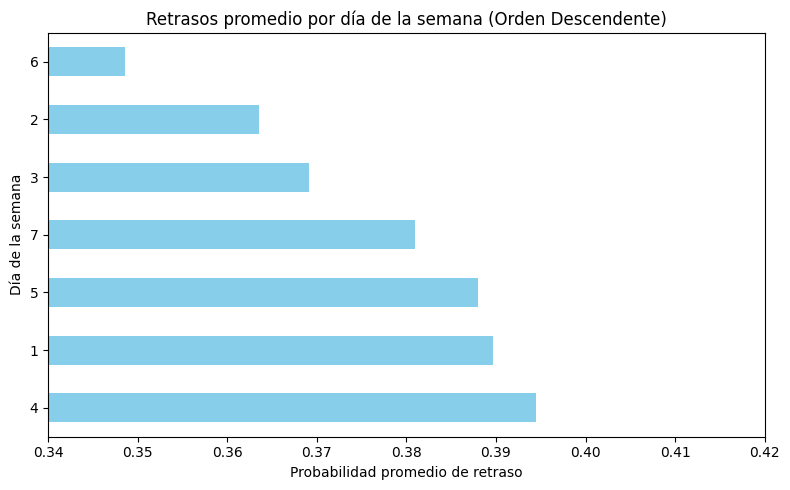

In [ ]:
day_of_week_delays = df_final_data.groupby("day_of_week")["delays"].mean().sort_values(ascending=False)

day_names_map = {
    1: 'monday', 2: 'Tuesday ', 3: 'wednesday', 4: 'thursday',
    5: 'friday', 6: 'saturday', 7: 'sunday'
}
day_labels = [day_names_map[day] for day in day_of_week_delays.index]

plt.figure(figsize=(8, 5))
day_of_week_delays.plot(kind="barh", color="skyblue")

plt.xlim(0.34, 0.42)

plt.xlabel("Probabilidad promedio de retraso")
plt.ylabel("Día de la semana")
plt.title("Retrasos promedio por día de la semana (Orden Descendente)")

plt.yticks(ticks=range(len(day_labels)), labels=day_labels)

plt.tight_layout()
plt.show()

/tmp/ipython-input-2966396154.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


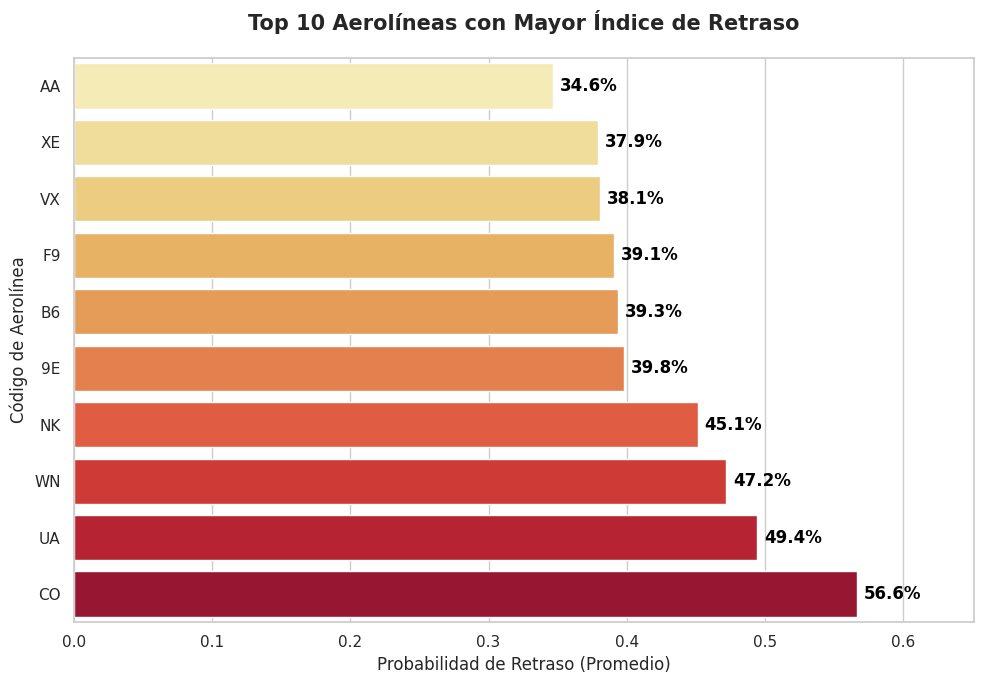

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


top_10_airlines = (
    df_final_data.groupby("airline")["delays"]
    .mean()
    .sort_values()
    .tail(10)
)

plt.figure(figsize=(10, 7))
sns.set_theme(style="whitegrid")


ax = sns.barplot(
    x=top_10_airlines.values,
    y=top_10_airlines.index,
    palette="YlOrRd"
)

plt.title("Top 10 Aerolíneas con Mayor Índice de Retraso", fontsize=15, fontweight='bold', pad=20)
plt.xlabel("Probabilidad de Retraso (Promedio)", fontsize=12)
plt.ylabel("Código de Aerolínea", fontsize=12)


for i, v in enumerate(top_10_airlines.values):
    ax.text(v + 0.005, i, f'{v:.1%}', color='black', va='center', fontweight='bold')

plt.xlim(0, top_10_airlines.max() * 1.15)
plt.tight_layout()
plt.show()

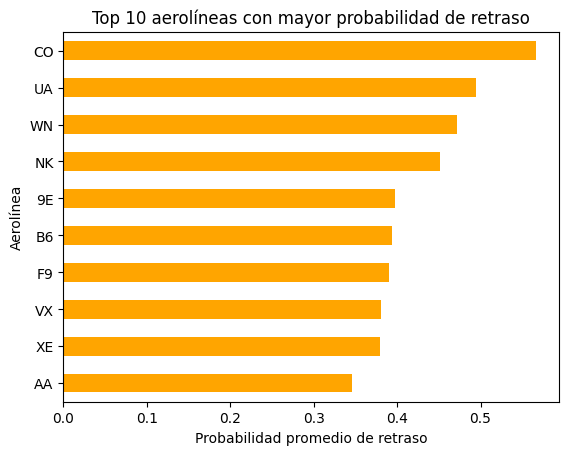

In [ ]:
plt.figure()
(
    df_final_data.groupby("airline")["delays"]
    .mean()
    .sort_values()
    .tail(10)
    .plot(kind="barh", color="orange")
)

plt.xlabel("Probabilidad promedio de retraso")
plt.ylabel("Aerolínea")
plt.title("Top 10 aerolíneas con mayor probabilidad de retraso")
plt.show()


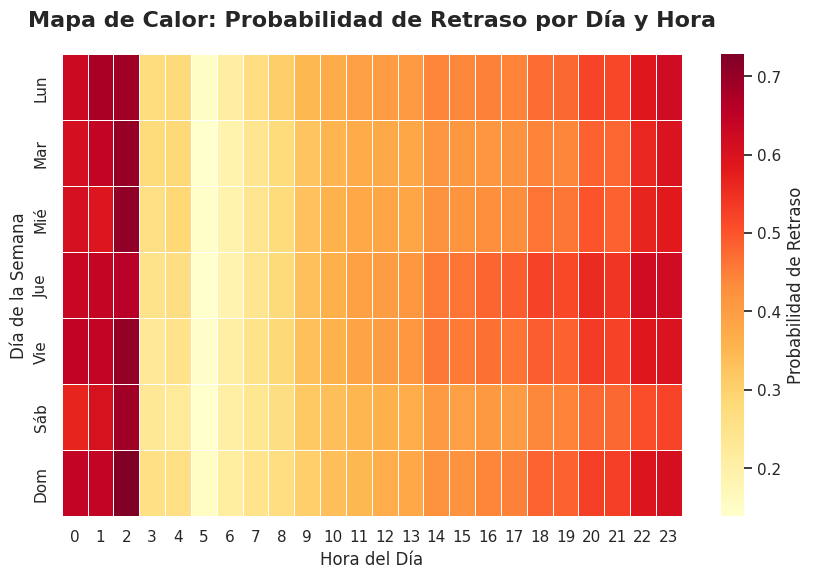

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Creamos una tabla pivote: Filas (Días), Columnas (Horas), Valores (Promedio de retrasos)
# Nota: Si tus días son números (1-7), puedes usar el map que hicimos antes
heatmap_data = df_final_data.pivot_table(index='day_of_week', columns='hour', values='delays', aggfunc='mean')

heatmap_data = heatmap_data.reindex(columns=range(0, 24))

# Opcional: Cambiar números de días a nombres para que se entienda mejor
day_names = {1: 'Lun', 2: 'Mar', 3: 'Mié', 4: 'Jue', 5: 'Vie', 6: 'Sáb', 7: 'Dom'}
heatmap_data.index = [day_names[d] for d in heatmap_data.index]

# 2. Configuración del gráfico
plt.figure(figsize=(10, 6))
sns.set_theme(style="white")

# 3. Dibujamos el heatmap
# cmap="YlOrRd" para que el rojo sea "peligro/retraso"
sns.heatmap(heatmap_data, annot=False, cmap="YlOrRd", linewidths=.5, cbar_kws={'label': 'Probabilidad de Retraso'})

# 4. Personalización
plt.title("Mapa de Calor: Probabilidad de Retraso por Día y Hora", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Hora del Día", fontsize=12)
plt.ylabel("Día de la Semana", fontsize=12)

plt.show()

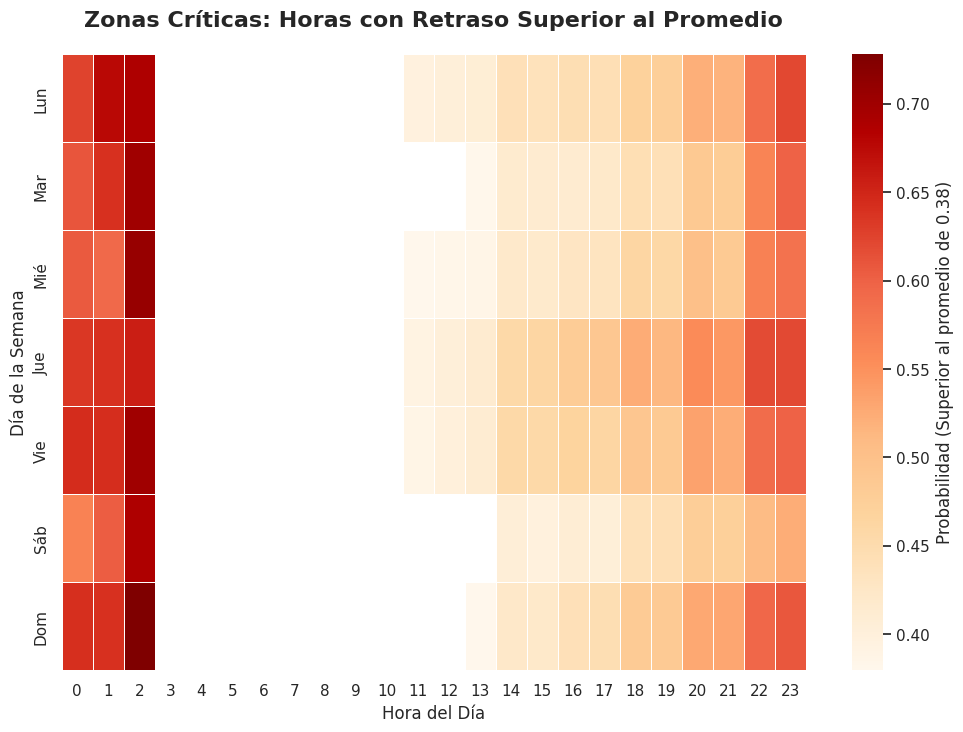

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Preparación de la tabla pivote y limpieza de horas (0-23)
heatmap_data = df_final_data.pivot_table(index='day_of_week', columns='hour', values='delays', aggfunc='mean')
heatmap_data = heatmap_data.reindex(columns=range(0, 24))

# Cambiar nombres de días
day_names = {1: 'Lun', 2: 'Mar', 3: 'Mié', 4: 'Jue', 5: 'Vie', 6: 'Sáb', 7: 'Dom'}
heatmap_data.index = [day_names[d] for d in heatmap_data.index]

# 2. DEFINIR EL UMBRAL (Threshold)
# Por ejemplo, solo queremos color si la probabilidad es mayor al promedio global
# O puedes poner un número fijo como 0.35
umbral = df_final_data["delays"].mean()

# Creamos una "máscara": será True (blanco) donde la probabilidad sea baja
mask = heatmap_data < umbral

# 3. Configuración del gráfico
plt.figure(figsize=(12, 8))
sns.set_theme(style="white") # Fondo blanco total

# 4. Dibujamos el heatmap con la máscara
# Las zonas que no cumplen el umbral se verán del color del fondo (blanco)
ax = sns.heatmap(heatmap_data,
                 mask=mask,
                 cmap="OrRd",
                 #annot=True, # Ponemos los números para que se vea el valor real
                 fmt=".2f",
                 linewidths=.5,
                 cbar_kws={'label': f'Probabilidad (Superior al promedio de {umbral:.2f})'})

plt.title("Zonas Críticas: Horas con Retraso Superior al Promedio", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Hora del Día", fontsize=12)
plt.ylabel("Día de la Semana", fontsize=12)

plt.show()

In [ ]:
airport_stats = df_final_data.groupby("airline").agg(
    retraso_promedio=("delays", "mean"),
    total_vuelos=("delays", "count")
)

airport_stats = airport_stats[airport_stats["total_vuelos"] > 500]

airport_stats.sort_values("retraso_promedio", ascending=False).head(10)


,retraso_promedio,total_vuelos
airline,,
CO,0.566199,21118
UA,0.494265,537153
WN,0.471908,1340226
NK,0.451167,115454
9E,0.397660,20686
B6,0.393373,280955
F9,0.390631,96746
VX,0.380859,61385
XE,0.378944,31126


In [ ]:
airport_stats.index.unique()

Index(['9E', 'AA', 'AS', 'B6', 'CO', 'DL', 'EV', 'F9', 'FL', 'HA', 'MQ', 'NK',
       'OH', 'OO', 'UA', 'US', 'VX', 'WN', 'XE', 'YV'],
      dtype='object', name='airline')

In [ ]:
df_final_data[df_final_data['destination'].str.contains(r'\d', na=False)]['destination'].value_counts()

,count
destination,
10397,1765
13930,1521
11298,1165
12892,1017
11292,1001
...,...
13459,1
14025,1
15497,1


In [ ]:
df_final_data[df_final_data['origin'].str.contains(r'\d', na=False)]['origin'].value_counts()

,count
origin,
10397,1761
13930,1525
11298,1145
12892,1004
11292,997
...,...
14222,1
14025,1
13502,1


In [ ]:
invalid_origin = (~df_final_data['origin'].str.match(r'^[A-Z]{3}$', na=False)).mean()
invalid_dest = (~df_final_data['destination'].str.match(r'^[A-Z]{3}$', na=False)).mean()

print(f"Origin inválidos: {invalid_origin:.2%}")
print(f"Destination inválidos: {invalid_dest:.2%}")


Origin inválidos: 7.71%
Destination inválidos: 7.71%


In [ ]:
df_final_data['origin'].str.len().value_counts()

,count
origin,
3.0,5788483
5.0,27024


In [ ]:
import numpy as np
df_final_data.loc[~df_final_data['origin'].str.match(r'^[A-Z]{3}$', na=False), 'origin'] = np.nan
df_final_data.loc[~df_final_data['destination'].str.match(r'^[A-Z]{3}$', na=False), 'destination'] = np.nan


In [ ]:
df_final_data= df_final_data.dropna(subset=["origin","destination"])

In [ ]:
df_final_data.isnull().sum()


,0
airline,0
day_of_week,0
origin,0
destination,0
time,0
delay,0
distance_mil,0
hour,0
distance_km,0
delays,0


In [ ]:
df_final_data.shape

(5788483, 10)

In [ ]:
df_final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5788483 entries, 0 to 6272308
Data columns (total 10 columns):
 #   Column        Dtype  
---  ------        -----  
 0   airline       object 
 1   day_of_week   int64  
 2   origin        object 
 3   destination   object 
 4   time          float64
 5   delay         float64
 6   distance_mil  int64  
 7   hour          float64
 8   distance_km   float64
 9   delays        int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 485.8+ MB


In [ ]:
df_final_data.to_csv("df_final_data.csv", index=False)
from google.colab import files

files.download("df_final_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>